# R-2R DAC

Author : Emad Etehadi
## What Is a DAC ?
The Digital to Analogue Converter, or DAC’s convert binary or non-binary numbers and codes into analogue ones with its output voltage (or current) being proportional to the value of its digital input number.
For example, we may have a 4-bit digital logic circuit that ranges from 0000 to 11112, (0 to F16) which a DAC converts to a voltage output ranging from 0 to 10V.
Converting an “n”-bit digital input code into an equivalent analogue output voltage between 0 and some VMAX value can be done in a number of ways, but the most common and easily understood conversion methods uses a weighted resistors and a summing amplifier, or a R-2R resistor ladder network and operational amplifier.
## R-2R DAC
R-2R Digital-to-Analogue Converter, or DAC, is a data converter which use two precision resistor to convert a digital binary number into an analogue output signal proportional to the value of the digital number.The R-2R resistive ladder network uses just two resistive values. One resistor has the base value “R”, and the second resistor has twice the value of the first resistor, “2R”, no matter how many bits are used to make up the ladder network.
So for example, we could just use a standard 1kΩ resistor for the base resistor “R”, and therefore a 2kΩ resistor for “2R” (or multiples thereof as the base value of R is not too critical). Thus the resistive value of 2R will always be twice the value of the base resistor, R. That is 2R = 2*R. This means that it is much easier for us to maintain the required accuracy of the resistors along the ladder network compared to the previous weighted resistor DAC. But what is a “R-2R resistive ladder network” anyway.

![Alt text](./photo/R2R.png)

## R-2R Resistive Ladder Network
As its name implies, the “ladder” description comes from the ladder-like configuration of the resistors used within the network. A R-2R resistive ladder network provides a simple means of converting digital voltage signals into an equivalent analogue output.
Input voltages are applied to the ladder network at various points along its length and the more input points the better the resolution of the R-2R ladder. The output signal as a result of all these input voltage points is taken from the end of the ladder which is used to drive the inverting input of an operational amplifier.
Then a R-2R resistive ladder network is nothing more than long strings of parallel and series connected resistors acting as interconnected voltage dividers along its length, and whose output voltage depends soley on the interaction of the input voltages with each other. Consider the basic 4-bit R-2R ladder network (4-bits because it has four input points) below.

![Alt text](./photo/img.png)

## 4-bit R-2R Resistive Ladder Network
![Alt text](./photo/img_1.png)

This 4-bit resistive ladder circuit may look complicated, but its all about connecting resistors together in parallel and series combinations and working back to the input source using simple circuit laws to find the proportional value of the output. Lets assume all the binary inputs are grounded at 0 volts, that is: VA = VB = VC = VD = 0V (LOW). The binary code corresponding to these four inputs will therefore be: 0000.
Starting from the left hand side and using the simplified equation for two parallel resistors and series resistors, we can find the equivalent resistance of the ladder network as:

![Alt text](./photo/img_2.png)

Resistors R1 and R2 are in “parallel” with each other but in “series” with resistor R3. Then we can find the equivalent resistance of these three resistors and call it RA for simplicity (or any other form of identification you want).

$ R_A = R_3 + \frac{R_1 \times R_2}{R_1 + R_2} = R + \frac{2R \times 2R}{2R + 2R} = R + R = 2R $

Then RA is equivalent to “2R”. Now we can see that the equivalent resistance “RA” is in parallel with R4 with the parallel combination in series with R5.

![Alt text](./photo/img_3.png)

Again we can find the equivalent resistance of this combination and call it RB.

$ R_B = R_5 + \frac{R_A \times R_4}{R_A + R_4} = R + \frac{2R \times 2R}{2R + 2R} = R + R = 2R $

So RB combination is equivalent to “2R”. Hopefully we can see that this equivalent resistance RB is in parallel with R6 with the parallel combination in series with R7 as shown.

![Alt text](./photo/img_4.png)

As before we find the equivalent resistance and call it RC.

$ R_C = R_7 + \frac{R_B \times R_6}{R_B + R_6} = R + \frac{2R \times 2R}{2R + 2R} = R + R = 2R $

Again, resistor combination RC is equivalent to “2R” which is in parallel with R8 as shown.

![Alt text](./photo/img_5.png)

As we have shown above, when two equal resistor values are paralled together, the resulting value is one-half, so 2R in parallel with 2R equals an equivalent resistance of R. So the whole 4-bit R-2R resistive ladder network comprising of individual resistors connected together in parallel and series combinations has an equivalent resistance (REQ) of “R” when a binary code of “0000” is applied to its four inputs.
Therefore with a binary code of “0000” applied as inputs, our basic 4-bit R-2R digital-to-analogue converter circuit would look something like this
## R-2R DAC Circuit with Four Zero (LOW) Inputs
![Alt text](./photo/img_6.png)

The output voltage for an inverting operational amplifier is given as: (RF/RIN)*VIN. If we make RF equal to R, that is RF = R = 1, and as R is terminated to ground (0V), then there is no VIN voltage value, (VIN = 0) so the output voltage would be: (1/1)*0 = 0 volts. So for a 4-bit R-2R DAC with four grounded inputs (LOW), the output voltage will be “zero” volts, thus a 4-bit digital input of 0000 produces an analogue output of 0 volts.
## How to Calculate Analog Voltage Output
Next, we’ll look at how to calculate the analog voltage output for a given parallel digital input on the b0, b1, etc. inputs. We’ll use the same Thevenin equivalents technique shown above, as well as Superposition. Superposition tells us that if you individually compute the contribution of a given source to the output (with all others voltage sources shorted and current sources opened), you can then sum the results for each of the sources to obtain the final result for the output.

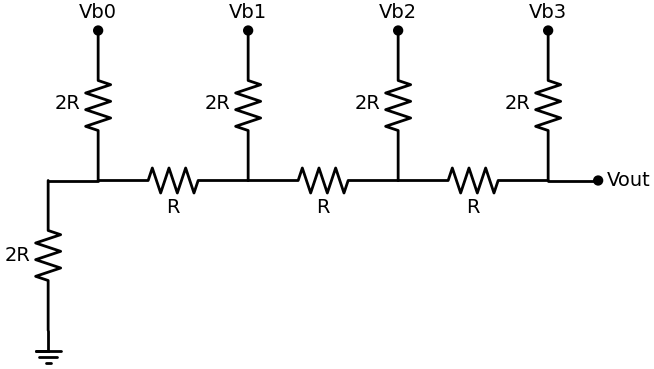

In [110]:
import schemdraw
from schemdraw import elements as elm
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.Resistor().up().label("2R")
    l = elm.Line().length(1).right()
    elm.Resistor().at(l.end).up().label("2R").label("Vb0" , "right").dot()
    e1 = elm.Resistor().at(l.end).right().label("R" , "bot")
    elm.Resistor().at(e1.end).up().label("2R").label("Vb1" , "right").dot()
    e2 = elm.Resistor().at(e1.end).right().label("R" , "bot")
    elm.Resistor().at(e2.end).up().label("2R").label("Vb2" , "right").dot()
    e3 = elm.Resistor().at(e2.end).right().label("R" , "bot")
    elm.Resistor().at(e3.end).up().label("2R").label("Vb3" , "right").dot()
    elm.Line().length(1).at(e3.end).right().label("Vout" , "right").dot()

We start by replacing the circuit to the left of the left-most cut-line with its Thevenin equivalent. The Thevenin equivalent, which is the series resistor of value R (parallel combination of two 2R resistors), and the open circuit voltage from the resistor divider $ \frac{V_{b0}}{2} $.

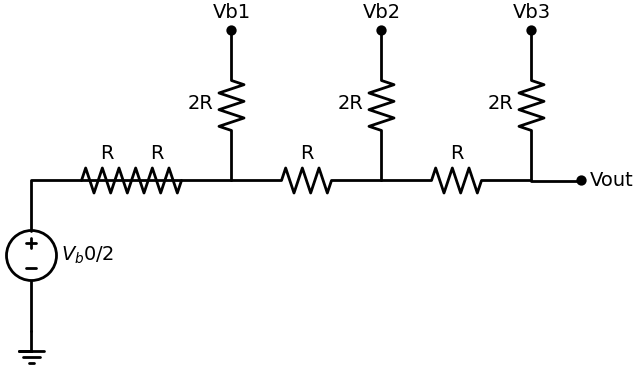

In [111]:
import schemdraw
from schemdraw import elements as elm
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceV().label('$ V_b0/2 $' , "bot")
    elm.Resistor().label("R").right()
    e1 = elm.Resistor().at(l.end).right().label("R")
    elm.Resistor().at(e1.end).up().label("2R").label("Vb1" , "right").dot()
    e2 = elm.Resistor().at(e1.end).right().label("R")
    elm.Resistor().at(e2.end).up().label("2R").label("Vb2" , "right").dot()
    e3 = elm.Resistor().at(e2.end).right().label("R")
    elm.Resistor().at(e3.end).up().label("2R").label("Vb3" , "right").dot()
    elm.Line().length(1).at(e3.end).right().label("Vout" , "right").dot()

The process continues methodically, step by step for each cut-line, substituting the equivalent circuit for each stage, as shown graphically below.

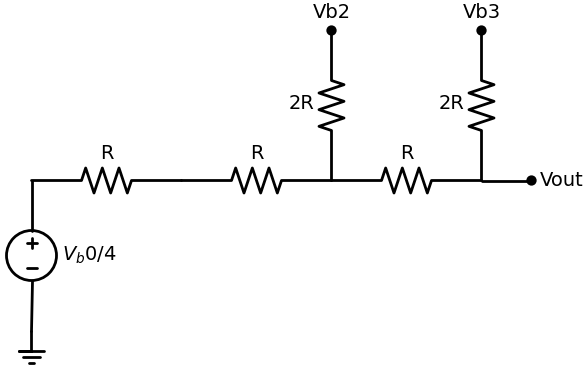

In [112]:
import schemdraw
from schemdraw import elements as elm
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceV().label('$ V_b0/4 $' , "bot")
    elm.Resistor().label("R").right()
    e2 = elm.Resistor().right().label("R")
    elm.Resistor().at(e2.end).up().label("2R").label("Vb2" , "right").dot()
    e3 = elm.Resistor().at(e2.end).right().label("R")
    elm.Resistor().at(e3.end).up().label("2R").label("Vb3" , "right").dot()
    elm.Line().length(1).at(e3.end).right().label("Vout" , "right").dot()

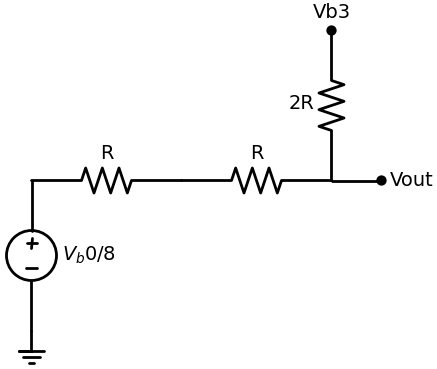

In [113]:
import schemdraw
from schemdraw import elements as elm
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceV().label('$ V_b0/8 $' , "bot")
    elm.Resistor().label("R").right()
    e3 = elm.Resistor().right().label("R")
    elm.Resistor().at(e3.end).up().label("2R").label("Vb3" , "right").dot()
    elm.Line().length(1).at(e3.end).right().label("Vout" , "right").dot()

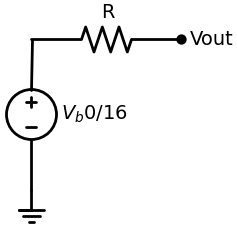

In [114]:
import schemdraw
from schemdraw import elements as elm
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceV().label('$ V_b0/16 $' , "bot")
    elm.Resistor().label("R").right().label("Vout" , "right").dot()

We can see that the voltage contribution from bit b0 is 1/16th of the logic high voltage level. Each bit stage that this voltage passes through cuts the contribution by a factor of 2.
## R-2R DAC with Input VA
![Alt text](./photo/img_10.png)

Input VA is HIGH and logic level “1” and all the other inputs grounded at logic level “0”. As the R/2R ladder network is a linear circuit we can find Thevenin’s equivalent resistance using the same parallel and series resistance calculations as above to calculate the expected output voltage. The output voltage, VOUT is therefore calculated at 312.5 milli-volts (312.5 mV).
As we have a 4-bit R-2R resistive ladder network, this 312.5 mV voltage change is one-sixteenth the value of the +5V input (5/0.3125 = 16) voltage so is classed as the Least Significant Bit, (LSB). Being the least significant bit, input VA will therefore determine the “resolution” of our simple 4-bit digital-to-analogue converter, as the smallest voltage change in the analogue output corresponds to a single step change of the digital inputs. Thus for our 4-bit DAC this will be 312.5mV (1/16th) for a +5V input.

In [3]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
circuit = Circuit('Voltage Divider Circuit') # Create a new circuit
# Add components to the circuit
circuit.V('V1', 'A', circuit.gnd, 5@u_V)  # Voltage source VA = 5V  
circuit.R('R1', 'A', '1', 2 * 1@u_kOhm)
circuit.R('R2', '1', 'B', 1@u_kOhm)
circuit.R('R3', 'B', 'C', 1@u_kOhm)
circuit.R('R4', 'C', 'Vout', 1@u_kOhm)
circuit.R('R5', 'Vout', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R6', '1', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R7', 'B', circuit.gnd, 2 * 1@u_kOhm)  
circuit.R('R8', 'C', circuit.gnd, 2 * 1@u_kOhm)  
# Create a simulator object
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()  
for node in analysis.nodes.values():
    print('Node {}: {:5.4f} V'.format(str(node), float(node))) # print Vout 

Node vout: 0.3125 V
Node c: 0.4687 V
Node b: 0.8594 V
Node 1: 1.6797 V
Node a: 5.0000 V


C:\Users\User\AppData\Local\Temp\ipykernel_20664\2891290805.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.4f} V'.format(str(node), float(node)))


## R-2R DAC with Input VB
![Alt text](./photo/img_11.png)

With input VB HIGH and logic level “1” and all the other inputs grounded at logic level “0”, the output voltage, VOUT is calculated at 625mV, and which is one-eighth (1/8th) the value of the +5V input (5/0.625 = 8) voltage. We can also see that it is double the output voltage when only input bit VA was applied, and we would expect this as its the 2nd bit (input) so has double the weighting of the 1st bit.

In [14]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
circuit = Circuit('Voltage Divider Circuit') # Create a new circuit
# Add components to the circuit
circuit.V('V1', 'B', circuit.gnd, 5@u_V)  # Voltage source VB = 5V  
circuit.R('R1', '1', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R2', '1', 'A', 1@u_kOhm)
circuit.R('R3', 'A', 'C', 1@u_kOhm)
circuit.R('R4', 'C', 'Vout', 1@u_kOhm) 
circuit.R('R5', 'Vout', circuit.gnd, 2 * 1@u_kOhm)  
circuit.R('R6', '1', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R8', 'A', 'B', 2 * 1@u_kOhm)  
circuit.R('R9', 'C', circuit.gnd, 2 * 1@u_kOhm)
# Create a simulator object
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()  
for node in analysis.nodes.values():
    print('Node {}: {:5.4f} V'.format(str(node), float(node))) # print Vout 

Node vout: 0.6250 V
Node c: 0.9375 V
Node a: 1.7188 V
Node 1: 0.8594 V
Node b: 5.0000 V


C:\Users\User\AppData\Local\Temp\ipykernel_20664\906227108.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.4f} V'.format(str(node), float(node)))


## R-2R DAC with Input VC
![Alt text](./photo/img_12.png)

With input VC HIGH and logic level “1” and the other input bits at logic level “0”, the output voltage, VOUT is calculated at 1.25 volts, and which is one-quarter (1/4) the value of the +5V input (5/1.25 = 4) voltage. Again we can see that this voltage is double the output of input bit VB but also 4 times the value of bit VA. This is because input VC is the 3rd bit so has double the weighting of the 2nd bit and four times the weighting of the 1st bit.

In [19]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
circuit = Circuit('Voltage Divider Circuit') # Create a new circuit
# Add components to the circuit
circuit.V('V1', 'C', circuit.gnd, 5@u_V)  # Voltage source VC = 5V  
circuit.R('R1', '1', circuit.gnd, 2 * 1@u_kOhm) 
circuit.R('R2', '1', 'B', 1@u_kOhm)
circuit.R('R3', 'B', 'A', 1@u_kOhm)  
circuit.R('R4', 'A', 'Vout', 1@u_kOhm)
circuit.R('R5', 'Vout', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R6', '1', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R8', 'B', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R9', 'A', 'C', 2 * 1@u_kOhm)
# Create a simulator object
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()  
for node in analysis.nodes.values():
    print('Node {}: {:5.4f} V'.format(str(node), float(node))) # print Vout 

Node vout: 1.2500 V
Node a: 1.8750 V
Node b: 0.9375 V
Node 1: 0.4687 V
Node c: 5.0000 V


C:\Users\User\AppData\Local\Temp\ipykernel_20664\2298293467.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.4f} V'.format(str(node), float(node)))


## R-2R DAC with Input VD
![Alt text](./photo/img_13.png)

With only input VD HIGH and logic level “1” and the other inputs at logic level “0”, the output voltage, VOUT is calculated at 2.5 volts. This is on-half (1/2) the value of the +5V input (5/2.5 = 2) voltage. Again we can see that this voltage is double the output of input bit VC, 4 times the value of bit VB and 8 times the value of input bit VA as it is the 4th bit and therefore classed as the Most Significant Bit, (MSB).

In [20]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
circuit = Circuit('Voltage Divider Circuit') # Create a new circuit
# Add components to the circuit
circuit.V('V1', 'D', circuit.gnd, 5@u_V)  # Voltage source VD = 5V  
circuit.R('R1', '1', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R2', '1', 'B', 1@u_kOhm)
circuit.R('R3', 'B', 'C', 1@u_kOhm)  
circuit.R('R4', 'C', 'Vout', 1@u_kOhm) 
circuit.R('R5', 'Vout', 'D', 2 * 1@u_kOhm)
circuit.R('R6', '1', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R8', 'B', circuit.gnd, 2 * 1@u_kOhm)
circuit.R('R9', 'C', circuit.gnd, 2 * 1@u_kOhm)  
# Create a simulator object
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()  
for node in analysis.nodes.values():
    print('Node {}: {:5.4f} V'.format(str(node), float(node)))  # print Vout

Node vout: 2.5000 V
Node c: 1.2500 V
Node b: 0.6250 V
Node 1: 0.3125 V
Node d: 5.0000 V


C:\Users\User\AppData\Local\Temp\ipykernel_20664\1302946153.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {:5.4f} V'.format(str(node), float(node)))


Then we can see that if input VA represents the LSB and therefore controls the DAC’s resolution, and input VB is double VA, input VC is four times greater than VA, and input VD is eight times greater than VA, we can obtain a relationship for the analogue output voltage of our 4-bit digital-to-analogue converter with the following equation:

$ V_{OUT} = \frac{V_A + 2V_B + 4V_C + 8V_D}{16}  $

## Generalised R-2R DAC Equation
We can expand this equation further to obtain a generalised R-2R DAC equation for any number of digital inputs for a R-2R D/A converter as the weighting of each input bit will always be referenced to the least significant bit (LSB), giving us a generalised equation of:

$ V_{OUT} = \frac{V_A + 2V_B + 4V_C + 8V_D + 16V_E + 32V_F + \ldots}{2^n} $  

Where: “n” represents the number of digital inputs within the R-2R resistive ladder network of the DAC producing a resolution of:
 
$ V_{LSB} = \frac{V_{IN}}{2^n} $

Clearly then input bit VA when HIGH will cause the smallest change in the output voltage, while input bit VD when HIGH will cause the greatest change in the output voltage. The expected output voltage is therefore calculated by summing the effect of all the individual input bits which are connected HIGH.
## 4-bit R-2R D/A Converter Voltage Output
Ideally, the ladder network should produce a linear relationship between the input voltages and the analogue output as each input will have a step increase equal to the LSB, we can create a table of expected output voltage values for all 16 combinations of the 4 inputs with +5V representing a logic “1” condition as shown.

![Alt text](./photo/img_14.jpg)

You may have noticed that the full-scale analogue output voltage for a binary code of 1111 never reaches the same value as the digital input voltage (+5V) as it is always less by the equivalent of one LSB bit, (312.5mV in this example).
However, the higher the number of digital input bits (resolution) the nearer the analogue output voltage reaches full-scale when all the input bits are HIGH. Likewise when all the input bits are LOW, the resulting lower resolution of LSB makes VOUT closer to zero volts.
## R-2R Digital-to-Analogue Converter
Now that we understand what a R-2R resistive ladder network is and how it works, we can use it to produce a R-2R Digital-to-Analogue Converter. Again using our 4-bit R-2R resistive ladder network from above and adding it to an inverting operational amplifier circuit, we can create a simple R-2R digital-to-analogue converter of:

![Alt text](./photo/img_15.png)

The digital logic circuit used to drive the D/A converter can be generated by combinational or sequential logic circuits, data registers, counters or simply switches. The interfacing of a R-2R D/A converter of “n”-bits will depend upon its application. All-in-one boards such as the Arduino or Raspberry Pi have digital-to-analogue converters built-in so make interfacing and programming much easier. There are many popular DAC’s available such as the 8-bit DAC0808.
## R-2R D/A Converter Example
A 4-bit R-2R digital-to-analogue converter is constructed to control the speed of a small DC motor using the output from a digital logic circuit. If the logic circuit uses 10 volt CMOS devices, calculate the analogue output voltage from the DAC when the input code is hexadecimal number “B”. Also determine the resolution of the DAC.
1). The hexadecimal letter “B” is equal to the number eleven in decimal. The decimal number eleven is equal to the binary code “1011” in binary. That is: B16 = 10112. Thus for our 4-bit binary number of 10112, input bit D = 1, bit C = 0, bit B = 1 and bit A = 1.
If we assume that feedback resistor RF is equal to “R”, then our R-2R D/A converter circuit will look like:

![Alt text](./photo/img_16.png)

The digital logic circuit uses 10 volt CMOS devices, so the input voltage to the R-2R network will be 10 volts. Also being a 4-bit ladder DAC, there will be 24 possible input combinations, so using our equation from above, the ouput voltage for a binary code of 10112 is calculated as:

$$ V_{OUT} = \frac{1V_A + 2V_B + 4V_C + 8V_D}{2^n} $$  

$$ V_{OUT} = \frac{1 \times 10 + 2 \times 10 + 4 \times 0 + 8 \times 10}{16} $$

$$ V_{OUT} = \frac{110}{16} = 6.875 \text{ Volts} $$

Therefore the analogue output voltage used to control the DC motor when the input code is 10112 is calculated as: -6.875 volts. Note that the output voltage is negative due to the inverting input of the operational amplifier.
2). The resolution of the converter will be equal to the value of the least significant bit (LSB) which is given as:
Resolution = $ \frac{V_IN}{2^n} $
Resolution = $ \frac{10}{16} $ = 0.625 Volts
Then the smallest step change of the analogue output voltage, VOUT for a 1-bit LSB change of the digital input of this 4-bit R-2R digital-to-analogue converter example is: 0.625 volts. That is the output voltage changes in steps or increments of 0.625 volts and not as a straight linear value.
## 4-bit Binary Counting R-2R DAC
The binary code for these four digital input lines can be generated in many different ways, using micro-controllers, digital circuits, mechanical or solid state switches. But one interesting option is to use a 4-bit binary counter such as the 74LS93.
The 74LS93 is a 4-bit J-K ripple counter which can be configured to count-up from 00002 to 11112 (MOD-16) and reset back to zero (0000) again by the application of a single external clock signal. The 74LS93 is an asynchronous counter commonly called a “ripple” counter because of the way that the internal J-K bistables respond to the clock or timing input producing a 4-bit binary output.
The frequency (or period) of this external clock or timing pulse is divided by a factor of 2, 4, 8, and 16 by the counters output lines as the clock pulse appears to ripple through the four J-K flip-flops producing the required 4-bit output count sequence from 00002 to 11112.

![Alt text](./photo/img_17.png)

Note that to count upwards from 0000 to 1111, the external CLKB input must be connected to the QA (pin-12) output and the input timing pulses are applied to input CLKA (pin-14).
This simple 4-bit asynchronous up counter built around the 74LS93 binary ripple counter as the same counting sequence given in the above table. On the application of a clock pulse the outputs: QA, QB, QC, and QD change by one step.
The input of the operational amplifier detects this step change and outputs a negative voltage (inverting op-amp) relative to the binary code at the R-2R ladder inputs. The output voltage value for each step will correspond to that given in the table above.
The ripple counter will count up in sequence with the four outputs producing an output sequence of binary values upto the 15th clock pulse where the outputs are set to 11112 (decimal 15) producing the maximum negative output voltage of the digital-to-analogue converter.
On the 16th pulse the counters output sequence is reset and the count returns back to 0000, which resets the op-amps output back to zero volts. The application of the next clock pulse begins a new counting cycle from zero to VOUT(max).
## 4-bit R-2R DAC Timing Diagram
We can show the output sequence for this simple 4-bit binary asynchronous counting R-2R D/A converter in the following timing diagram.

![Alt text](./photo/img_18.png)

Clearly then, the output voltage of the operational amplifier varies from zero volts to its maximum negative voltage as the ripple counter counts from 00002 to 11112 respectively. This simple circuit could be used to vary the brightness of a lamp connected to the op-amps output, or continually vary the speed of a DC motor from slow to fast, and back to slow again at a rate determined by the clock period.
Here the ripple counter and R-2R DAC are configured for 4-bit operation but using commonly available binary ripple counters such as the CMOS 4024 7-bit (÷128), the CMOS 4040 12-bit (÷4096) or the larger CMOS 4060 14-bit (÷16,384) counter and adding more input resistors to the R-2R ladder network such as those available from Bournes, the resolution (LSB) of the circuit can be greatly lowered producing a smoother output signal from the R-2R digital-to-analogue converter.
## Conclusion
In this article, we learned about the digital to analog converter and its structure and examples.Digital-to-analog converters (DACs) play a crucial role in bridging the gap between digital signal processing and the analog world. At their core, they translate the binary data—comprising zeros and ones—into continuous electrical signals that devices can interpret. This process is essential in various applications, from audio playback to video transmission and telecommunications.
## Sources
https://www.electronics-tutorials.ws/combination/r-2r-dac.html
https://www.tek.com/en/blog/tutorial-digital-analog-conversion-r-2r-dac?bpv=2